<a href="https://colab.research.google.com/github/Sarik123-long/Data-Analytics-with_Oasis_Infobyte/blob/main/Project_6_wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving archive (42).zip to archive (42).zip
User uploaded file "archive (42).zip" with length 21984 bytes


In [2]:
import zipfile

zip_file_path = 'archive (42).zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import pandas as pd

df = pd.read_csv('WineQT.csv')
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (914, 11)
Shape of X_test: (229, 11)
Shape of y_train: (914,)
Shape of y_test: (229,)


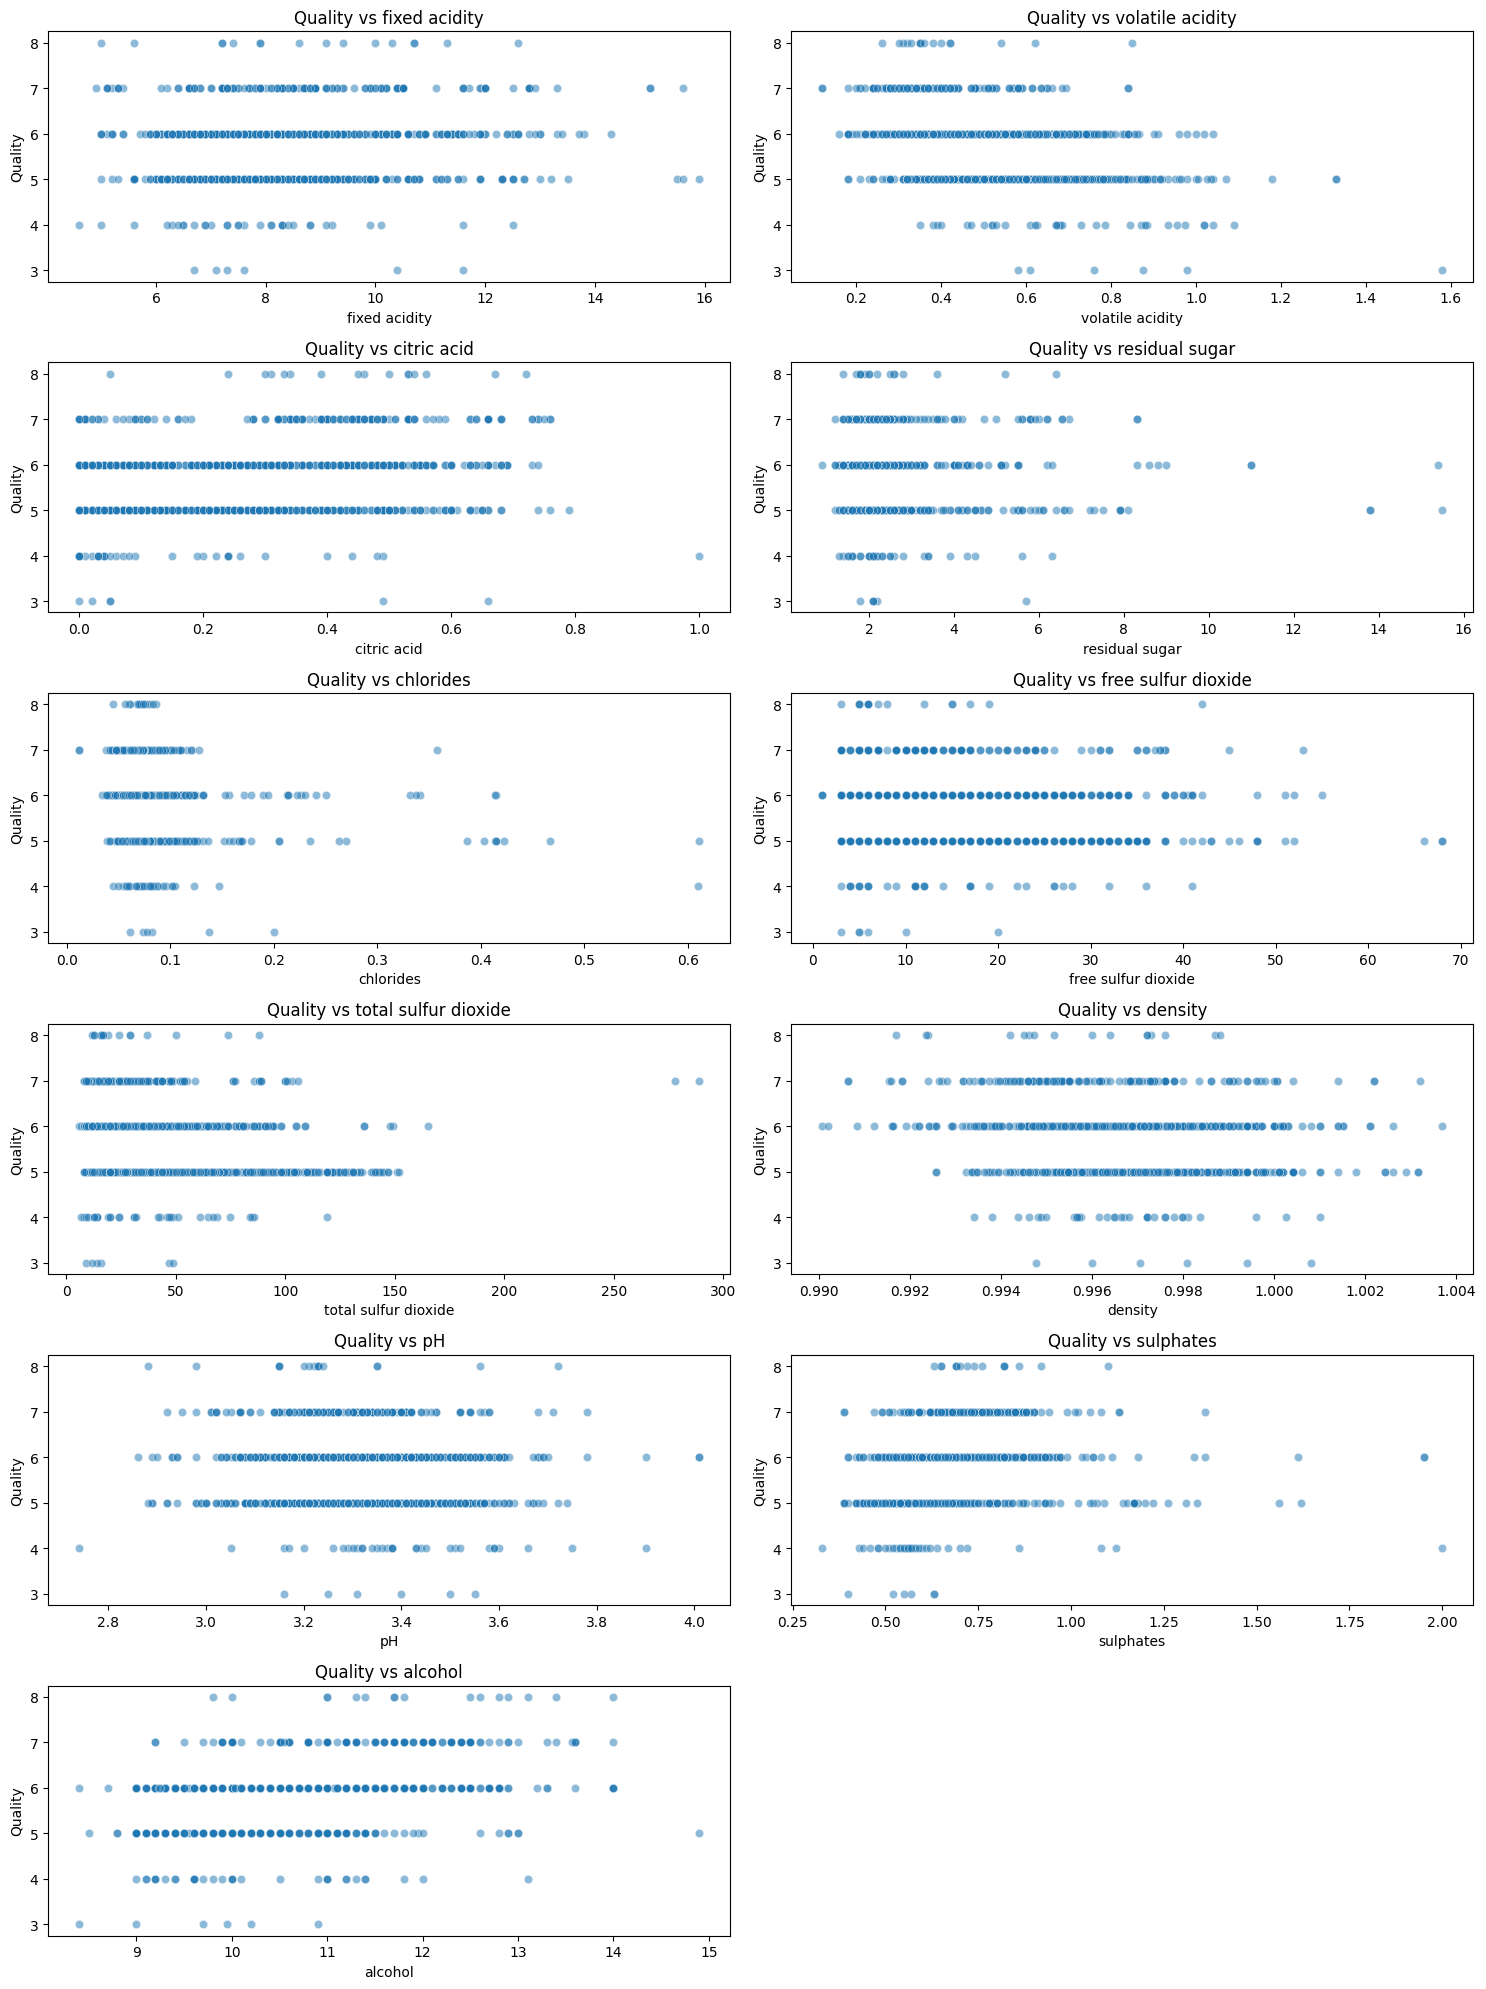

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

chemical_features = X.columns

plt.figure(figsize=(15, 20))
for i, feature in enumerate(chemical_features):
    plt.subplot(6, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df['quality'], alpha=0.5)
    plt.title(f'Quality vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

rf_model = RandomForestClassifier()
sgd_model = SGDClassifier(max_iter=1000, tol=1e-3)
svc_model = SVC()

In [8]:
rf_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC()

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_predictions = rf_model.predict(X_test)
sgd_predictions = sgd_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)

print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

print("\nStochastic Gradient Descent Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, sgd_predictions))
print("Classification Report:\n", classification_report(y_test, sgd_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, sgd_predictions))

print("\nSupport Vector Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print("Classification Report:\n", classification_report(y_test, svc_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))

Random Forest Model Evaluation:
Accuracy: 0.6855895196506551
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.79      0.75        96
           6       0.65      0.65      0.65        99
           7       0.71      0.65      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.66      0.69      0.67       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 76 20  0  0]
 [ 0 28 64  7  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]

Stochastic Gradient Descent Model Evaluation:
Accuracy: 0.4672489082969432
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.11      0.20        96
           6       0.45      0.97      0.62        99

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [10]:
if hasattr(rf_model, 'feature_importances_'):
  feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
  sorted_feature_importances = feature_importances.sort_values(ascending=False)
  print("Feature Importances (Random Forest):")
  display(sorted_feature_importances)
else:
  print("Random Forest model does not have feature_importances_ attribute.")

Feature Importances (Random Forest):


,0
alcohol,0.142625
sulphates,0.113548
volatile acidity,0.108661
total sulfur dioxide,0.097618
density,0.089987
chlorides,0.081293
fixed acidity,0.077410
pH,0.075920
citric acid,0.075661
free sulfur dioxide,0.068837
